In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, YearLocator, date2num, drange
import matplotlib.ticker as ticker
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta

In [47]:
df = pd.read_csv(r"C:\Users\daisu\Documents\原指数.csv")

In [48]:
df = df.drop(df.columns[[0,1,2]], axis=1)
df = df.T
df = df.rename_axis('date').reset_index()

In [51]:
df = df.iloc[:,:2]
df = df.rename(columns={0:'steel'})
df['date'] = pd.to_datetime(df['date'] + "01")

In [68]:
np.mean(df.loc[24:35,'steel'])
df

,date,steel
0,2013-01-01,89.1
1,2013-02-01,94
2,2013-03-01,105.6
3,2013-04-01,96.3
4,2013-05-01,95.8
...,...,...
90,2020-07-01,90.4
91,2020-08-01,80
92,2020-09-01,95.5
93,2020-10-01,97.4


In [67]:
df.loc[72,:]

date     2019-01-01 00:00:00
steel                   95.8
Name: 72, dtype: object

In [71]:
df = df.drop(df.index[[i for i in range(72)]])
df = df.reset_index(drop=True)

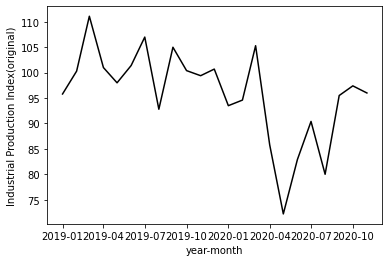

In [86]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(df['date'],df['steel'], color='black')
ax.set_xlabel('year-month')
ax.set_ylabel('Industrial Production Index(original)')
#ax.xaxis.set_major_locator(YearLocator(1))
ax.xaxis.set_major_formatter(DateFormatter('%Y-%m'))
fig.savefig("原指数.png")

In [85]:
df2 = pd.read_csv(r"C:\Users\daisu\Documents\季節調整済指数.csv")

,品目番号,品目名称,付加生産ウエイト,201301,201302,201303,201304,201305,201306,201307,...,202002,202003,202004,202005,202006,202007,202008,202009,202010,p 202011
0,1000000000,鉱工業,10000.0,94.8,96.5,97.7,97.7,99.3,98.2,99.8,...,99.5,95.8,86.4,78.7,80.2,87.2,88.1,91.5,95.2,95.2
1,1100000000,製造工業,9983.0,94.8,96.4,97.7,97.7,99.2,98.2,99.7,...,99.7,95.8,86.4,78.7,80.3,87.2,88.1,91.6,95.2,95.2
2,1101000000,鉄鋼・非鉄金属工業,624.8,99.2,100.1,101.8,102.9,103.1,102.6,102.9,...,98.9,91.5,77.8,66.9,66.2,73.7,78.5,83.0,87.5,90.7
3,1101100000,鉄鋼業,423.2,101.2,101.7,103.9,106.0,105.5,105.0,104.8,...,97.4,89.0,75.1,64.0,62.1,69.0,74.6,78.2,83.2,87.5
4,1101101000,鉄鋼粗製品,110.0,101.2,100.5,102.9,105.6,106.3,105.0,104.8,...,96.9,87.8,75.4,64.6,63.6,68.7,71.7,75.0,79.6,84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,4110000000,はん用・生産用・業務用機械工業（22年基準）,1436.6,85.4,86.5,91.9,90.7,91.8,90.3,92.2,...,101.6,94.4,92.3,82.5,87.2,87.7,84.1,85.7,94.5,98.7
153,4100000100,普通鋼鋼材（22年基準）,157.0,105.1,104.7,105.6,107.2,106.1,104.6,103.5,...,96.0,87.3,76.2,68.2,65.2,69.5,74.8,75.7,79.2,85.3
154,4100000200,特殊鋼鋼材（22年基準）,69.5,99.7,101.5,107.0,106.4,106.2,108.1,108.5,...,99.4,94.4,77.6,60.5,55.8,60.3,70.3,75.0,85.5,88.7
155,4100000300,乗用車・バス・トラック（22年基準）,926.3,96.1,98.8,96.7,100.8,99.7,100.7,100.2,...,98.1,93.4,57.5,43.9,56.4,78.6,86.2,96.5,103.9,97.7
